<a href="https://colab.research.google.com/github/octaviamardiana/simulasi_kendali_fuzzy-lampu/blob/main/simulasi_kendali_fuzzy_lampu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kecepatan kipas untuk suhu 28°C: 59.26%


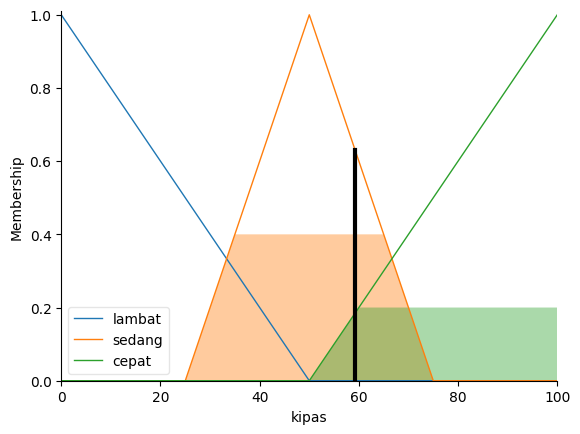

In [4]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
# 1. Definisi variabel linguistik
suhu = ctrl.Antecedent(np.arange(0, 41, 1), 'suhu') # suhu dalam °C
kipas = ctrl.Consequent(np.arange(0, 101, 1), 'kipas') # kecepatan kipas (%)
# 2. Fungsi keanggotaan
suhu['dingin'] = fuzz.trimf(suhu.universe, [0, 0, 20])
suhu['nyaman'] = fuzz.trimf(suhu.universe, [15, 25, 30])
suhu['panas'] = fuzz.trimf(suhu.universe, [25, 40, 40])
kipas['lambat'] = fuzz.trimf(kipas.universe, [0, 0, 50])
kipas['sedang'] = fuzz.trimf(kipas.universe, [25, 50, 75])
kipas['cepat'] = fuzz.trimf(kipas.universe, [50, 100, 100])
# 3. Aturan fuzzy
rule1 = ctrl.Rule(suhu['dingin'], kipas['lambat'])
rule2 = ctrl.Rule(suhu['nyaman'], kipas['sedang'])
rule3 = ctrl.Rule(suhu['panas'], kipas['cepat'])
# 4. Sistem kontrol
sistem_kipas_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
sistem_kipas = ctrl.ControlSystemSimulation(sistem_kipas_ctrl)
# 5. Simulasi: Masukkan suhu tertentu
sistem_kipas.input['suhu'] = 28
sistem_kipas.compute()
# 6. Output hasil defuzzifikasi
print(f"Kecepatan kipas untuk suhu 28°C: {sistem_kipas.output['kipas']:.2f}%")
kipas.view(sim=sistem_kipas)
plt.show()

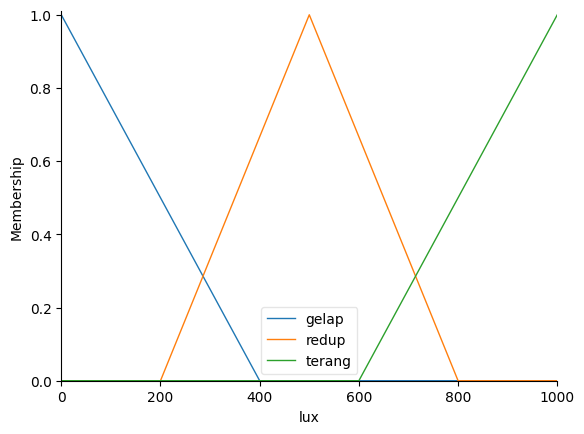

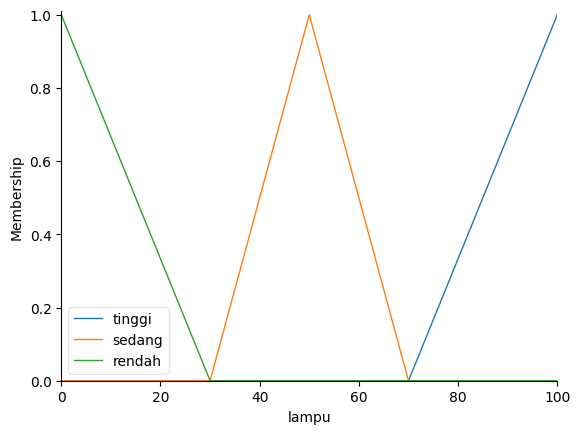

Tingkat cahaya: 50 lux → Kecerahan lampu: 89.86%


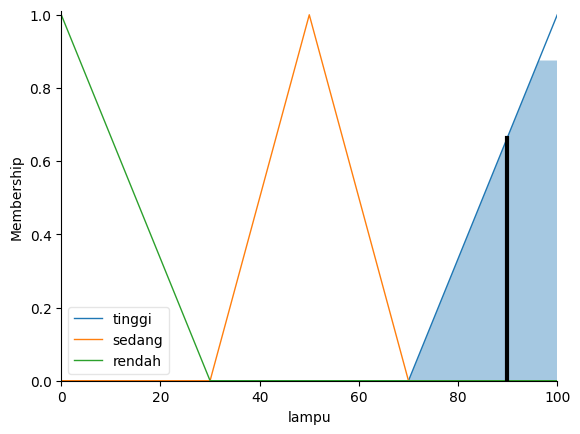

Tingkat cahaya: 400 lux → Kecerahan lampu: 50.00%


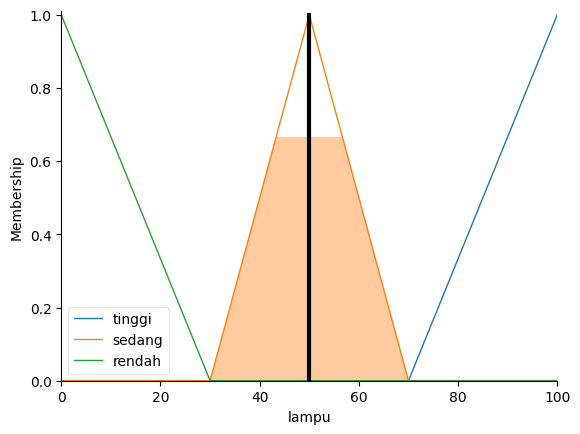

Tingkat cahaya: 850 lux → Kecerahan lampu: 11.02%


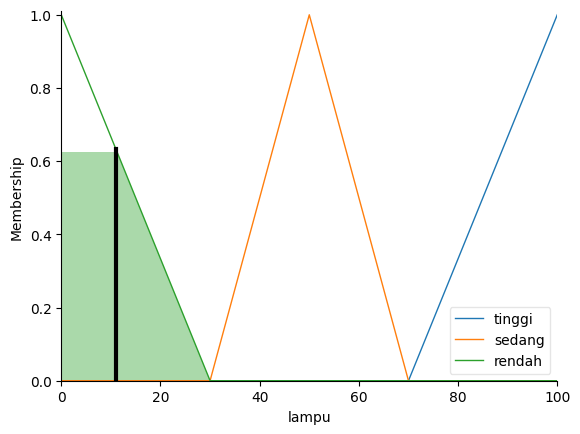

In [2]:
# 1. Instalasi pustaka
!pip install -q scikit-fuzzy

# 2. Import library
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 3. Definisi variabel linguistik
lux = ctrl.Antecedent(np.arange(0, 1001, 1), 'lux')         # Input: tingkat cahaya lingkungan (lux)
lampu = ctrl.Consequent(np.arange(0, 101, 1), 'lampu')      # Output: PWM kecerahan lampu (%)

# 4. Fungsi keanggotaan
lux['gelap'] = fuzz.trimf(lux.universe, [0, 0, 400])
lux['redup'] = fuzz.trimf(lux.universe, [200, 500, 800])
lux['terang'] = fuzz.trimf(lux.universe, [600, 1000, 1000])

lampu['tinggi'] = fuzz.trimf(lampu.universe, [70, 100, 100])
lampu['sedang'] = fuzz.trimf(lampu.universe, [30, 50, 70])
lampu['rendah'] = fuzz.trimf(lampu.universe, [0, 0, 30])

# 5. Visualisasi fungsi keanggotaan
lux.view()
lampu.view()
plt.show()

# 6. Aturan fuzzy
rule1 = ctrl.Rule(lux['gelap'], lampu['tinggi'])
rule2 = ctrl.Rule(lux['redup'], lampu['sedang'])
rule3 = ctrl.Rule(lux['terang'], lampu['rendah'])

# 7. Sistem kontrol fuzzy
sistem_lampu_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
sistem_lampu = ctrl.ControlSystemSimulation(sistem_lampu_ctrl)

# 8. Simulasi untuk nilai lux tertentu
nilai_lux = [50, 400, 850]

for nilai in nilai_lux:
    sistem_lampu.input['lux'] = nilai
    sistem_lampu.compute()
    hasil_pwm = sistem_lampu.output['lampu']
    print(f"Tingkat cahaya: {nilai} lux → Kecerahan lampu: {hasil_pwm:.2f}%")

    # Tampilkan visualisasi keluaran
    lampu.view(sim=sistem_lampu)
    plt.show()
